# Notebook for Creating a Logarithmic Return Matrix
This notebook focuses on the creation of a log return matrix for S&P 500 intraday stock data. The goal is to prepare a time-series dataset where rows represent 5-minute intervals, columns correspond to tickers, and cells contain the log returns. This matrix will later be used for clustering market states based on temporal patterns.

Let's start by importing the necessary libraries. Key libraries include :
- `matplotlib`: For creating clear and visually appealing plots to analyze and interpret the data.
- `numpy` and `pandas`: For numerical calculations and efficient DataFrame manipulations.

In [ ]:
# Import necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

To create the log return matrix, we use as a base our dataset contains intraday data at the minute level with calculated features. Let's load it.

In [ ]:
# Load the dataset
df = pd.read_csv('S&P500_intraday_cleaned.csv')

To create consistent 5-minute intervals, we process the timestamp column. First, we combine the date and time columns into a single timestamp. Then, we round down the timestamps to the nearest 5 minutes to create uniform time intervals across tickers. This step ensures that data points are aligned by time, enabling meaningful comparisons across tickers. We group the data by ticker and 5-minute intervals and extract the first mid price within each interval. The first mid price serves as a reference point for calculating log returns.

In [ ]:
# Combine date and time columns into a single timestamp
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Round down to the nearest 5-minute interval for grouping
df['timestamp_5min'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_convert('America/New_York').dt.floor('5T')

# Group by ticker and 5-minute interval
grouped = df.groupby(['ticker', 'timestamp_5min'])

# Get the first mid_price value within each group
df['mid_price_first'] = grouped['mid_price'].transform('first')

Here is the dataframe obtained after modifications.

In [30]:
# Display the modified dataframe
display(df.head(20))

,ticker,date,time,bid_price,bid_volume,ask_price,ask_volume,mid_price,order_density,order_imbalance,spread,vw_spread,relative_spread,log_return,volatility,timestamp,timestamp_5min,mid_price_first
0,AAP,2010-01-04,09:31:00-05:00,40.47,10.0,40.76,1.0,40.615,11.0,0.818182,0.29,3.19,0.007140,NaN,NaN,2010-01-04 09:31:00-05:00,2010-01-04 09:30:00-05:00,40.615
1,AAP,2010-01-04,09:32:00-05:00,40.78,7.0,40.80,1.0,40.790,8.0,0.750000,0.02,0.16,0.000490,0.004299,NaN,2010-01-04 09:32:00-05:00,2010-01-04 09:30:00-05:00,40.615
2,AAP,2010-01-04,09:36:00-05:00,40.72,25.0,40.77,4.0,40.745,29.0,0.724138,0.05,1.45,0.001227,-0.001104,0.003821,2010-01-04 09:36:00-05:00,2010-01-04 09:35:00-05:00,40.745
3,AAP,2010-01-04,09:38:00-05:00,40.78,16.0,40.80,3.0,40.790,19.0,0.684211,0.02,0.38,0.000490,0.001104,0.002717,2010-01-04 09:38:00-05:00,2010-01-04 09:35:00-05:00,40.745
4,AAP,2010-01-04,09:39:00-05:00,40.78,12.0,40.82,2.0,40.800,14.0,0.714286,0.04,0.56,0.000980,0.000245,0.002296,2010-01-04 09:39:00-05:00,2010-01-04 09:35:00-05:00,40.745
5,AAP,2010-01-04,09:40:00-05:00,40.78,10.0,40.78,1.0,40.780,11.0,0.818182,0.00,0.00,0.000000,-0.000490,0.002118,2010-01-04 09:40:00-05:00,2010-01-04 09:40:00-05:00,40.780
6,AAP,2010-01-04,09:41:00-05:00,40.76,13.0,40.81,1.0,40.785,14.0,0.857143,0.05,0.70,0.001226,0.000123,0.001915,2010-01-04 09:41:00-05:00,2010-01-04 09:40:00-05:00,40.780
7,AAP,2010-01-04,09:42:00-05:00,40.81,5.0,40.82,3.0,40.815,8.0,0.250000,0.01,0.08,0.000245,0.000735,0.001748,2010-01-04 09:42:00-05:00,2010-01-04 09:40:00-05:00,40.780
8,AAP,2010-01-04,09:43:00-05:00,40.76,16.0,40.78,8.0,40.770,24.0,0.333333,0.02,0.48,0.000491,-0.001103,0.001740,2010-01-04 09:43:00-05:00,2010-01-04 09:40:00-05:00,40.780
9,AAP,2010-01-04,09:46:00-05:00,40.79,8.0,40.82,1.0,40.805,9.0,0.777778,0.03,0.27,0.000735,0.000858,0.001632,2010-01-04 09:46:00-05:00,2010-01-04 09:45:00-05:00,40.805


To avoid redundancy, we filter out consecutive rows within the same ticker that have duplicate 5-minute timestamps. This step ensures that each ticker has only one entry per 5-minute window, preserving the temporal integrity of the dataset. Log returns are then computed for each ticker based on the first mid price values within each 5-minute intervals.

In [33]:
# Filter the necessary columns
filtered_df = df[['ticker', 'timestamp_5min', 'mid_price_first']]

# Remove consecutive timestamp duplicates within the same ticker
filtered_df = filtered_df.loc[
    ~(filtered_df['timestamp_5min'].eq(filtered_df['timestamp_5min'].shift()) &
      filtered_df['ticker'].eq(filtered_df['ticker'].shift()))
]

# Compute log returns for each ticker within 5-minute windows
filtered_df['log_return_5min'] = (
    filtered_df.groupby('ticker')['mid_price_first']
    .apply(lambda x: np.log(x) - np.log(x.shift(1)))
    .reset_index(level=0, drop=True)
)

# Display the results
display(filtered_df)

,ticker,timestamp_5min,mid_price_first,log_return_5min
0,AAP,2010-01-04 09:30:00-05:00,40.615,NaN
2,AAP,2010-01-04 09:35:00-05:00,40.745,0.003196
5,AAP,2010-01-04 09:40:00-05:00,40.780,0.000859
9,AAP,2010-01-04 09:45:00-05:00,40.805,0.000613
12,AAP,2010-01-04 09:50:00-05:00,40.840,0.000857
...,...,...,...,...
27887587,ZMH,2010-12-31 15:35:00-05:00,54.030,0.000278
27887591,ZMH,2010-12-31 15:40:00-05:00,53.995,-0.000648
27887596,ZMH,2010-12-31 15:45:00-05:00,53.960,-0.000648
27887598,ZMH,2010-12-31 15:50:00-05:00,53.720,-0.004458


We pivot the processed data to create the log return matrix :
- Rows represent 15-minute time intervals,
- Columns correspond to tickers,
- Cells contain the computed log returns.

This structure is crucial for clustering algorithms, as it allows us to analyze patterns across multiple tickers over time.

In [36]:
# Pivot the dataframe to construct the log return matrix with timestamps as rows and tickers as columns
log_return_matrix = filtered_df.pivot(index='timestamp_5min', columns='ticker', values='log_return_5min')

# Display the log return matrix
display(log_return_matrix)

ticker,A,AA,AAP,ABC,ABD,ABT,ACE,ACL,ACN,ADI,...,WRB,WSH,WU,WY,XEC,XEL,XOM,XRX,YUM,ZMH
timestamp_5min,,,,,,,,,,,,,,,,,,,,,
2010-01-04 09:30:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04 09:35:00-05:00,0.002244,0.000305,0.003196,0.003240,0.011375,NaN,-0.005353,0.009064,0.007080,0.001886,...,-0.001012,0.000000,-0.000262,-0.005957,0.006124,-0.004239,0.000436,-0.000590,0.000427,-0.000926
2010-01-04 09:40:00-05:00,0.001280,0.002130,0.000859,0.004746,0.005970,0.004071,0.001192,NaN,0.002627,-0.000157,...,0.001417,0.000000,0.003145,-0.000575,0.000370,0.003534,0.000872,0.001179,0.000142,0.004368
2010-01-04 09:45:00-05:00,-0.000160,0.000911,0.000613,0.002081,0.006592,0.002122,-0.005076,-0.002188,-0.000477,0.007044,...,-0.004053,0.001131,-0.001571,0.004359,0.001848,0.000235,-0.001235,0.004703,0.001422,0.001340
2010-01-04 09:50:00-05:00,-0.000480,0.001820,0.000857,0.001511,-0.013228,0.001473,0.000898,0.000938,-0.000358,0.000312,...,-0.001016,0.003573,0.000786,0.004796,0.006715,0.000470,0.001380,0.001172,0.000994,0.002007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 15:40:00-05:00,0.000000,0.001947,-0.000150,0.000000,-0.001167,-0.000312,0.001042,0.000092,0.000620,0.000000,...,0.000000,0.000578,-0.000268,-0.001053,-0.000897,0.000000,-0.000954,0.000000,0.000407,-0.000648
2010-12-31 15:45:00-05:00,-0.000481,0.001943,-0.003759,-0.000292,0.005240,-0.000417,0.000561,-0.000643,0.000826,0.000000,...,0.000364,0.000289,-0.000805,-0.000527,-0.000561,-0.000212,-0.002800,-0.000866,0.000305,-0.000648
2010-12-31 15:50:00-05:00,-0.003860,-0.004865,-0.001508,-0.003955,-0.013447,-0.002086,-0.001282,-0.000214,-0.001549,-0.002256,...,-0.002554,-0.002893,-0.002687,-0.002376,-0.004164,-0.002972,0.000000,-0.003471,-0.002240,-0.004458


Let's now see the number of nan that our matrix presents. These values ​​will have to be treated because they can harm our future manipulations within the framework of the clustering algorithm.

In [39]:
# Calculate the percentage of missing values
nan_percentage = log_return_matrix.isna().sum().sum() / log_return_matrix.size * 100

print(f"Percentage of NaN values in the matrix : {nan_percentage:.2f}%")

Percentage of NaN values in the matrix : 6.52%


We create visualizations to better understand missing values.

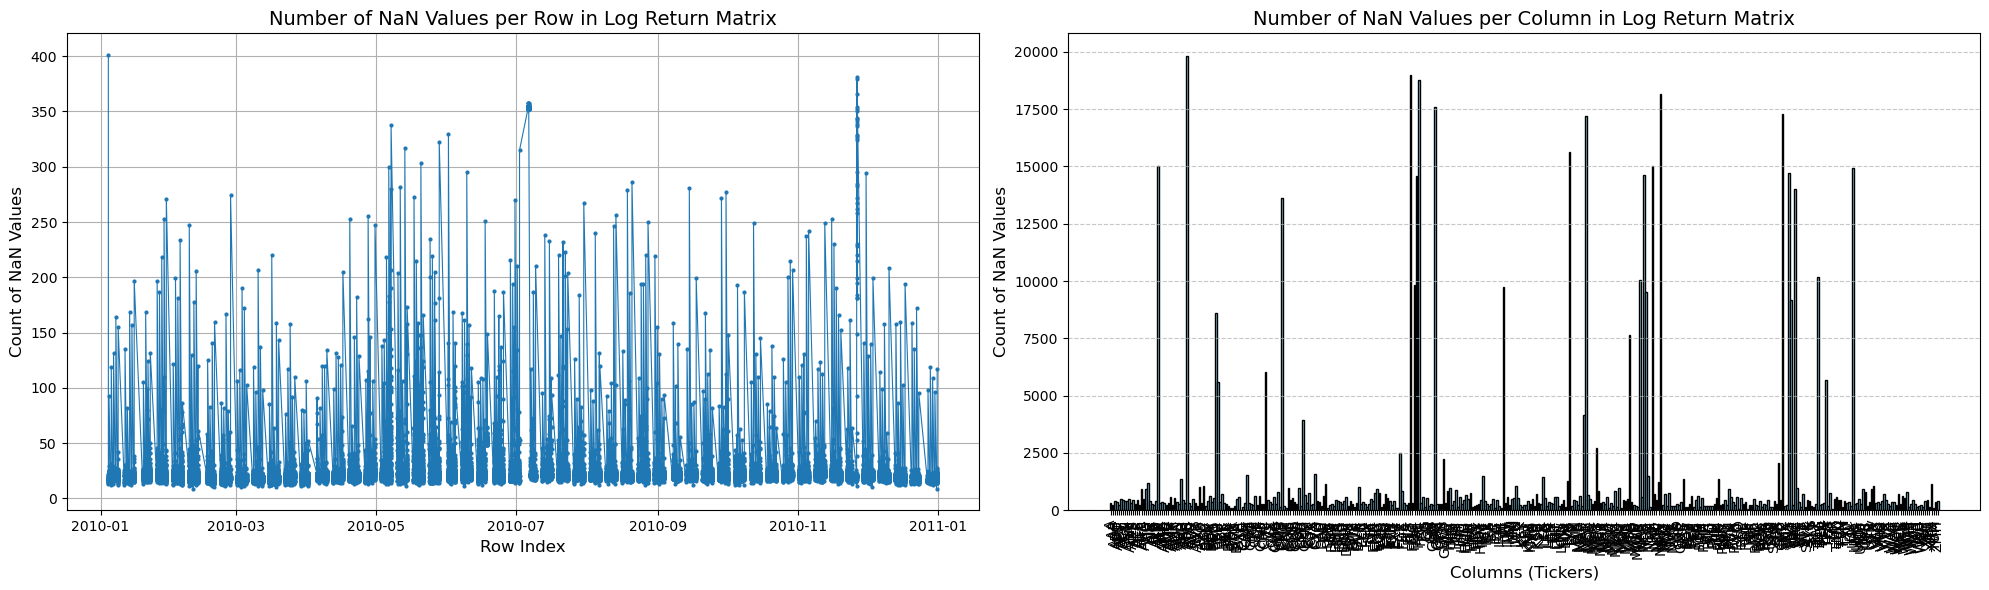

In [42]:
# Calculate the number of NaNs per row
nan_count_per_row = log_return_matrix.isna().sum(axis=1)

# Calculate the number of NaNs per column
nan_count_per_column = log_return_matrix.isna().sum()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot 1: NaN values per row
axes[0].plot(nan_count_per_row, marker='o', markersize=2, linestyle='-', linewidth=0.8)
axes[0].set_title('Number of NaN Values per Row in Log Return Matrix', fontsize=14)
axes[0].set_xlabel('Row Index', fontsize=12)
axes[0].set_ylabel('Count of NaN Values', fontsize=12)
axes[0].grid(True)

# Plot 2: NaN values per column
axes[1].bar(nan_count_per_column.index, nan_count_per_column.values, color='skyblue', edgecolor='black')
axes[1].set_title('Number of NaN Values per Column in Log Return Matrix', fontsize=14)
axes[1].set_xlabel('Columns (Tickers)', fontsize=12)
axes[1].set_ylabel('Count of NaN Values', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

The above visualizations illustrate the distribution of missing values (NaN) in both rows and columns of the log return matrix.
- Rows Analysis (5-minute Trading Intervals) : The first plot shows the number of NaN values per row. By visual inspection, it is clear that several rows contain a high proportion of missing values. Specifically, rows with more than 300 NaNs out of 401 columns (approximately 75% missing values) can be deemed invalid due to insufficient data for meaningful analysis.
- Columns Analysis (Tickers): The second plot highlights the number of NaNs per column. It reveals that certain tickers have substantial gaps in their data, with some exceeding 15,000 missing values out of 19,908 rows (approximately 75% missing values). These columns represent tickers with incomplete data and are therefore unsuitable for clustering analysis.

Given these observations, we will remove rows and columns that exceed the 75% missing value threshold. Rows with excessive NaNs correspond to time intervals with insufficient trading data, while columns with high NaNs represent tickers that are not actively traded or lack sufficient historical records. Eliminating these entries will help maintain the quality and reliability of the dataset for clustering analysis. This cleaning step ensures that the resulting log return matrix only includes rows and columns with adequate data, thus preserving the analytical validity of the dataset for our market state segmentation study.

In [45]:
# Remove columns with 60% or more NaNs
log_return_matrix = log_return_matrix.loc[:, log_return_matrix.isna().mean() < 0.75]

# Delete lines with 75% or more NaNs
log_return_matrix = log_return_matrix.loc[log_return_matrix.isna().mean(axis=1) < 0.75]

# Show dataframe preview
display(log_return_matrix)

ticker,A,AA,AAP,ABC,ABD,ABT,ACE,ACL,ACN,ADI,...,WRB,WSH,WU,WY,XEC,XEL,XOM,XRX,YUM,ZMH
timestamp_5min,,,,,,,,,,,,,,,,,,,,,
2010-01-04 09:35:00-05:00,0.002244,0.000305,0.003196,0.003240,0.011375,NaN,-0.005353,0.009064,0.007080,0.001886,...,-0.001012,0.000000,-0.000262,-0.005957,0.006124,-0.004239,0.000436,-0.000590,0.000427,-0.000926
2010-01-04 09:40:00-05:00,0.001280,0.002130,0.000859,0.004746,0.005970,0.004071,0.001192,NaN,0.002627,-0.000157,...,0.001417,0.000000,0.003145,-0.000575,0.000370,0.003534,0.000872,0.001179,0.000142,0.004368
2010-01-04 09:45:00-05:00,-0.000160,0.000911,0.000613,0.002081,0.006592,0.002122,-0.005076,-0.002188,-0.000477,0.007044,...,-0.004053,0.001131,-0.001571,0.004359,0.001848,0.000235,-0.001235,0.004703,0.001422,0.001340
2010-01-04 09:50:00-05:00,-0.000480,0.001820,0.000857,0.001511,-0.013228,0.001473,0.000898,0.000938,-0.000358,0.000312,...,-0.001016,0.003573,0.000786,0.004796,0.006715,0.000470,0.001380,0.001172,0.000994,0.002007
2010-01-04 09:55:00-05:00,-0.001922,-0.001517,0.000122,-0.000566,-0.001332,-0.001381,-0.000998,-0.005926,-0.000836,-0.003436,...,0.000203,-0.003008,-0.001572,0.001707,0.000733,-0.001882,-0.002035,0.000586,-0.001989,-0.000752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 15:40:00-05:00,0.000000,0.001947,-0.000150,0.000000,-0.001167,-0.000312,0.001042,0.000092,0.000620,0.000000,...,0.000000,0.000578,-0.000268,-0.001053,-0.000897,0.000000,-0.000954,0.000000,0.000407,-0.000648
2010-12-31 15:45:00-05:00,-0.000481,0.001943,-0.003759,-0.000292,0.005240,-0.000417,0.000561,-0.000643,0.000826,0.000000,...,0.000364,0.000289,-0.000805,-0.000527,-0.000561,-0.000212,-0.002800,-0.000866,0.000305,-0.000648
2010-12-31 15:50:00-05:00,-0.003860,-0.004865,-0.001508,-0.003955,-0.013447,-0.002086,-0.001282,-0.000214,-0.001549,-0.002256,...,-0.002554,-0.002893,-0.002687,-0.002376,-0.004164,-0.002972,0.000000,-0.003471,-0.002240,-0.004458


Following our earlier analysis, we identified rows (5-minute trading intervals) and columns (tickers) with more than 75% missing values as irrelevant due to insufficient data. As a result, we removed 100 rows and 11 columns from the log return matrix. This cleaning step eliminates entries that are unsuitable for clustering analysis, improving the overall quality and completeness of the dataset.

In [48]:
# Checking the remaining percentage of NaN
remaining_nan_percentage = log_return_matrix.isna().mean().mean() * 100

print(f"Remaining average percentage of NaN values : {remaining_nan_percentage:.2f}%")

Remaining average percentage of NaN values : 3.85%


Following the removal of 100 rows and 11 columns with excessive missing values, the average percentage of NaN values across the filtered log return matrix has been reduced to 3.85%. This significant improvement indicates that the dataset is now much cleaner and more robust, with only a small fraction of missing values remaining.

In [ ]:
# Save DataFrame df
df.to_csv('df_5min.csv', index=False)

In [ ]:
# Save DataFrame filtered_df_5min
filtered_df.to_csv('filtered_df_5min.csv', index=False)

In [ ]:
# Save log returns matrix
log_return_matrix.to_csv('log_return_matrix.csv', index=True)

With the dataset now cleaned and refined, and the results successfully saved, we have established a strong and reliable foundation for the next phases of our analysis. We are now prepared to proceed with the calculation of the correlation matrix and implement clustering techniques, such as the Louvain algorithm, to segment the dataset into distinct market states. This refined dataset ensures that our analysis will be robust, meaningful, and well-suited for capturing the temporal dynamics and patterns within the financial markets.